# 卷积

> 使用卷积来替换模板匹配

## 模板匹配vs卷积

模板匹配实际上就是将卷积核做了归一化和原图像的区域做了归一化，然后做了一个乘法运算，然后将结果相加，这个过程就是模板匹配。

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

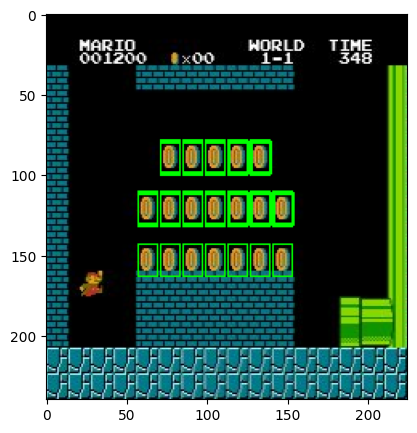

In [2]:
img_rgb = cv2.imread('images/mario.png')
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('images/template.png', cv2.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCORR_NORMED)
threshold = 0.9
loc = np.where( res > threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,0), 1)

# 显示匹配结果
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
plt.figure("Predict", figsize=(5, 5))
plt.imshow(img_bgr)
plt.show()

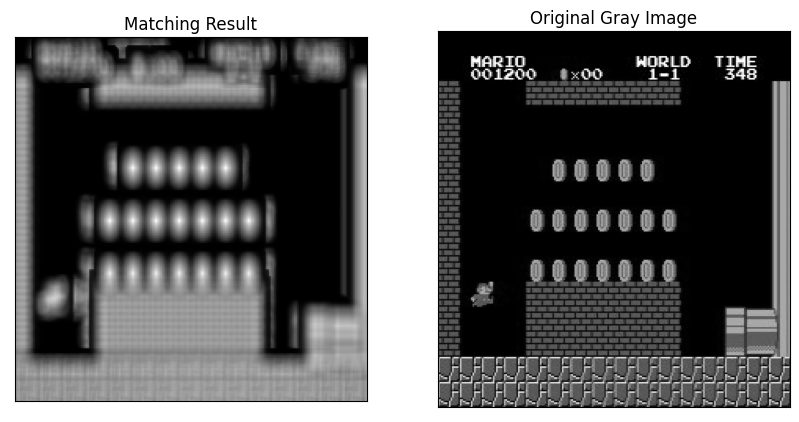

In [7]:
plt.figure("Matching Similaroty vs Original Gray Image", figsize=(10, 5))
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_gray,cmap = 'gray')
plt.title('Original Gray Image'), plt.xticks([]), plt.yticks([])
plt.show()

## 重新选择模板

我们总是希望卷积核的宽度和长度一致所以这里我们重新选择过模板

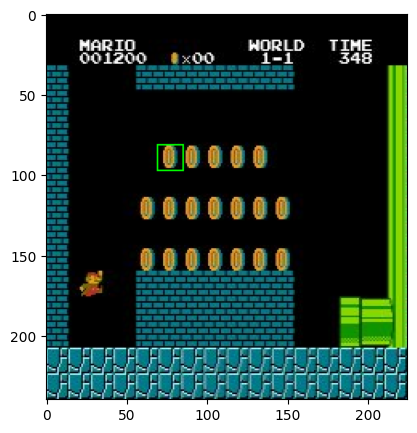

In [8]:
mario = cv2.imread('images/mario.png')
tmp_mario = mario.copy()
# 选择一个区域作为模板
bbox = [69, 81, 16, 16] # [左上角x, 左上角y, 宽度w, 高度h]
x, y, w, h = bbox
tmp_mario = cv2.rectangle(tmp_mario, [x, y], [x+w, y+h], (0, 255, 0), 1)

# 显示框出模板的图片
tmp_mario_BGR = cv2.cvtColor(tmp_mario, cv2.COLOR_RGB2BGR)
plt.figure("Mario", figsize=(5, 5))
plt.imshow(tmp_mario_BGR)
plt.show()

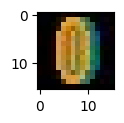

In [9]:
# 将框出的区域作为模板
template = mario[y:y+h, x:x+w, :]
# 显示模板
template_BGR = cv2.cvtColor(template, cv2.COLOR_RGB2BGR)
plt.figure("Template", figsize=(1, 1))
plt.imshow(template_BGR)
plt.show()

In [10]:
cv2.imwrite('images/template16x16.png', template)

True